<a href="https://colab.research.google.com/github/dinasoltanit/masters-projects/blob/master/LBM_MixingLength_Cylinder_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flow Past Cylinder (for an isothermal fluid)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Simulation parameters
Nx = 400    # resolution x-dir
Ny = 100    # resolution y-dir
Nt = 100   # number of timesteps

In [3]:
# Flow properties
rho0 = 100    # average density
#tau = 0.6    # collision timescale
tau0 = 0.6    # collision timescale
T = 273 + 15 # Temperature for isothermal fluid

In [4]:
# Calculate the Tau based on Prandtl's Mixing Length Turbulence Model
Dh = Ny / 2
Gammaa = 0.22
lmix = Gammaa * Dh # Mixing Length - Based on flow on flat plate
kappaa = 0.41 # Von-Karman Number
omega0 = 1 / tau0
Q = (kappaa * lmix)**2 / (2 * rho0 * T**2)
omega = (2*omega0) / (np.sqrt(1 + 4* Q* omega0**2) + 1)
tau = 1 / omega

In [6]:
tau

0.6000020435505404

In [7]:
plotRealTime = True # switch on for plotting as the simulation goes along

In [8]:
NL = 9
idxs = np.arange(NL)
cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1

In [9]:
# Initial Conditions
F = np.ones((Ny,Nx,NL)) #* rho0 / NL
np.random.seed(42)
F += 0.01*np.random.randn(Ny,Nx,NL)
X, Y = np.meshgrid(range(Nx), range(Ny))
F[:,:,3] += 2 * (1+0.2*np.cos(2*np.pi*X/Nx*4))
rho = np.sum(F,2)
for i in idxs:
  F[:,:,i] *= rho0 / rho

In [10]:
# Cylinder boundary
X, Y = np.meshgrid(range(Nx), range(Ny))
cylinder = (X - Nx/4)**2 + (Y - Ny/2)**2 < (Ny/4)**2

In [11]:
# Prep figure
fig = plt.figure(figsize=(4,2), dpi=80)

<Figure size 320x160 with 0 Axes>

0


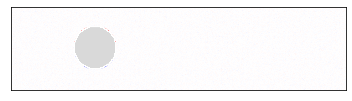

1
2
3
4
5
6
7
8
9
10


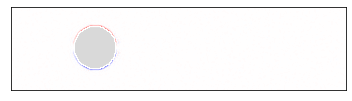

11
12
13
14
15
16
17
18
19
20


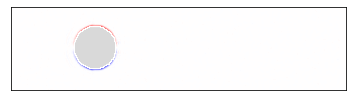

21
22
23
24
25
26
27
28
29
30


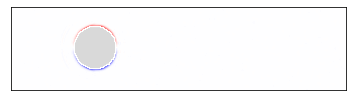

31
32
33
34
35
36
37
38
39
40


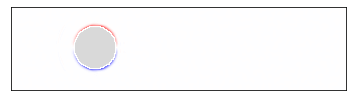

41
42
43
44
45
46
47
48
49
50


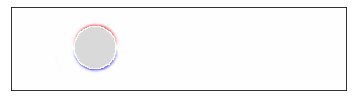

51
52
53
54
55
56
57
58
59
60


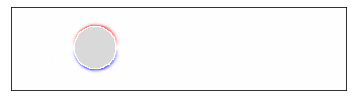

61
62
63
64
65
66
67
68
69
70


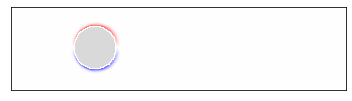

71
72
73
74
75
76
77
78
79
80


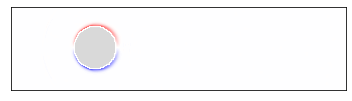

81
82
83
84
85
86
87
88
89
90


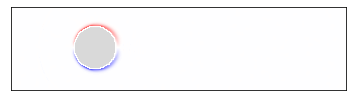

91
92
93
94
95
96
97
98
99


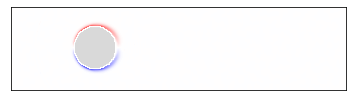

In [12]:
# Simulation Main Loop
for it in range(Nt):
  print(it)
  
  # Drift
  for i, cx, cy in zip(idxs, cxs, cys):
    F[:,:,i] = np.roll(F[:,:,i], cx, axis=1)
    F[:,:,i] = np.roll(F[:,:,i], cy, axis=0)
  
  
  # Set reflective boundaries
  bndryF = F[cylinder,:]
  bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]

  
  # Calculate fluid variables
  rho = np.sum(F,2)
  ux  = np.sum(F*cxs,2) / rho
  uy  = np.sum(F*cys,2) / rho
  
  
  # Apply Collision
  Feq = np.zeros(F.shape)
  for i, cx, cy, w in zip(idxs, cxs, cys, weights):
    Feq[:,:,i] = rho * w * ( 1 + 3*(cx*ux+cy*uy)  + 9*(cx*ux+cy*uy)**2/2 - 3*(ux**2+uy**2)/2 )
  
  F += -(1.0/tau) * (F - Feq)
  
  # Apply boundary 
  F[cylinder,:] = bndryF

  # plot in real time - color 1/2 particles blue, other half red
  if (plotRealTime and (it % 10) == 0) or (it == Nt-1):
    plt.cla()
    ux[cylinder] = 0
    uy[cylinder] = 0
    vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
    vorticity[cylinder] = np.nan
    vorticity = np.ma.array(vorticity, mask=cylinder)
    plt.imshow(vorticity, cmap='bwr')
    plt.imshow(~cylinder, cmap='gray', alpha=0.3)
    plt.clim(-.1, .1)
    ax = plt.gca()
    ax.invert_yaxis()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)	
    ax.set_aspect('equal')	
    plt.pause(0.001)

In [ ]:
# Save figure
plt.savefig('latticeboltzmann.png',dpi=240)
plt.show()